In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('cancer patient data sets').worksheet('Sheet')

data = worksheet.get_all_values()

In [ ]:
import pandas as pd
df = pd.DataFrame(data[1:], columns=data[0])

In [ ]:
df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.rename(columns={'Patient Id':'pid','Age':'age','Gender':'gender','Air Pollution':'air_pollution','Alcohol use':'alcohol_use','Dust Allergy':'dust_allergy','OccuPational Hazards':'occupational_hazards','Genetic Risk':'genetic_risk','chronic Lung Disease':'cronic_lungdisease','Balanced Diet':'balanceddiet','Passive Smoker':'passive_smoker','Chest Pain':'chestpain','Coughing of Blood':'cough_blood','Weight Loss':'weightloss','Shortness of Breath':'short_breath','Swallowing Difficulty':'swallow_difficulty','Clubbing of Finger Nails':'clubbing_finger_nails','Frequent Cold':'freq_cold','Dry Cough':'drycough'},inplace=True)

In [ ]:
df.head()

,pid,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,cronic_lungdisease,balanceddiet,...,Fatigue,weightloss,short_breath,Wheezing,swallow_difficulty,clubbing_finger_nails,freq_cold,drycough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [48]:
import warnings

warnings.filterwarnings('ignore')

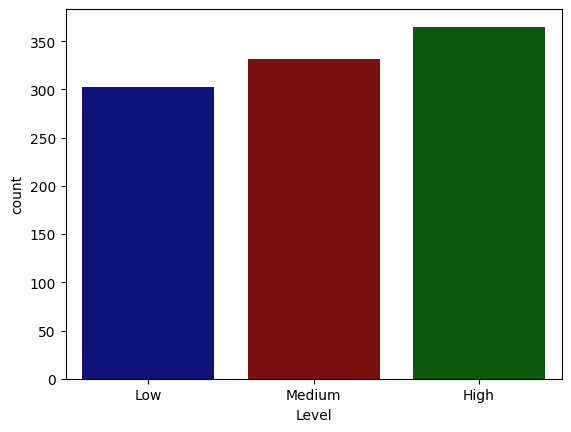

In [49]:
fig, ax=plt.subplots()
plot=sns.countplot(data=df, x='Level', palette=['darkblue','darkred','darkgreen'])#Count plot
plot;

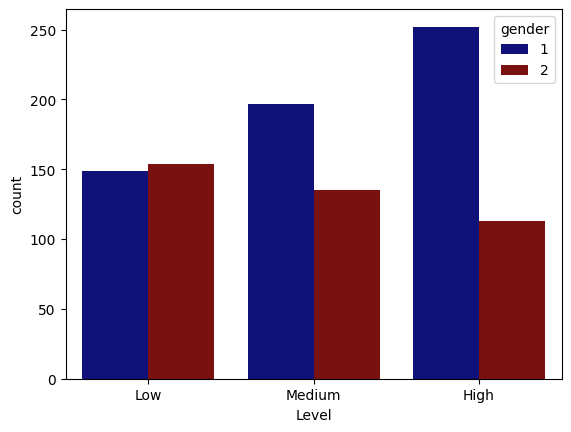

In [50]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.countplot(data=df, x='Level', hue='gender', palette=['darkblue','darkred'])#Count plot
plot;

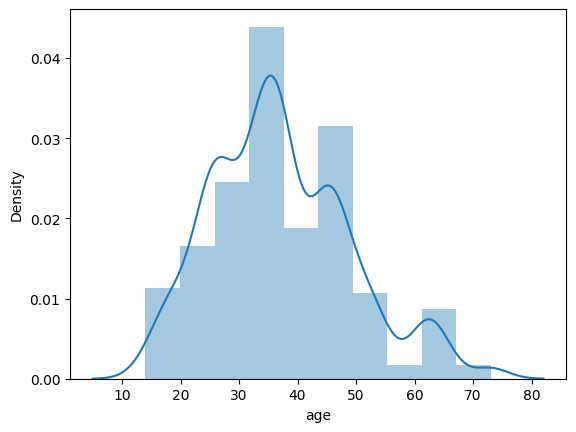

In [54]:
sns.distplot(df['age'], bins=10);

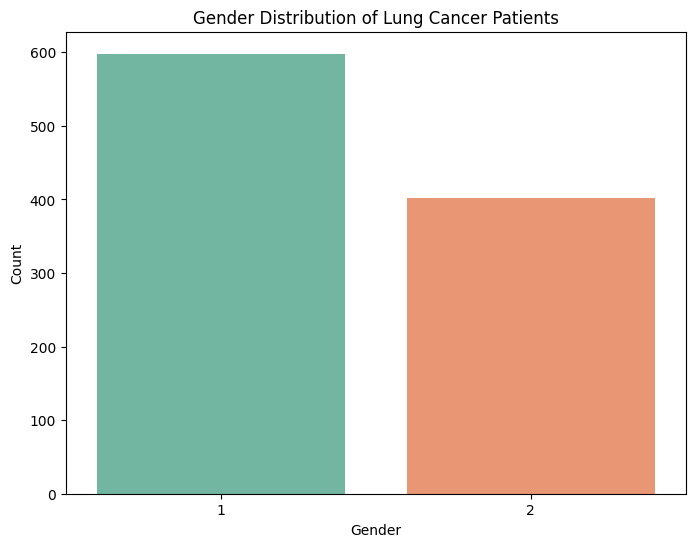

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Gender Distribution of Lung Cancer Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

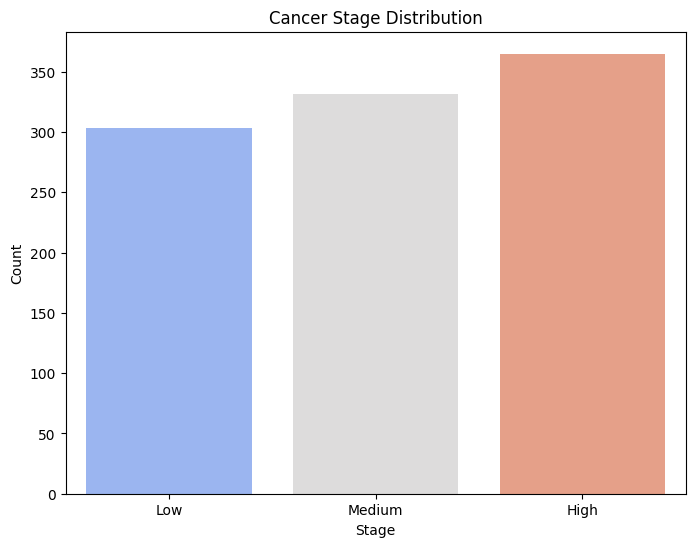

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Level', data=df, palette='coolwarm')
plt.title('Cancer Stage Distribution')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

In [64]:
x=df.drop(['pid','Level'], axis=1)

y=df['Level']

In [65]:
x.head()

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,cronic_lungdisease,balanceddiet,Obesity,...,cough_blood,Fatigue,weightloss,short_breath,Wheezing,swallow_difficulty,clubbing_finger_nails,freq_cold,drycough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [66]:
y.head()

,Level
0,Low
1,Medium
2,High
3,High
4,High


In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state= 42)

In [68]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((670, 23), (330, 23), (670,), (330,))

In [69]:
pip install category_encoders

In [70]:
import category_encoders as ce

In [71]:
encoder = ce.OrdinalEncoder(cols=['Level'])

y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [72]:
import numpy as np

y_train = y_train.to_numpy().ravel()  # Convert DataFrame to NumPy array, then flatten
y_test = y_test.to_numpy().ravel()

In [73]:
# Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=72,random_state=42)

rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=72, random_state=42)

In [75]:
y_pred = rfc.predict(x_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 1.0000


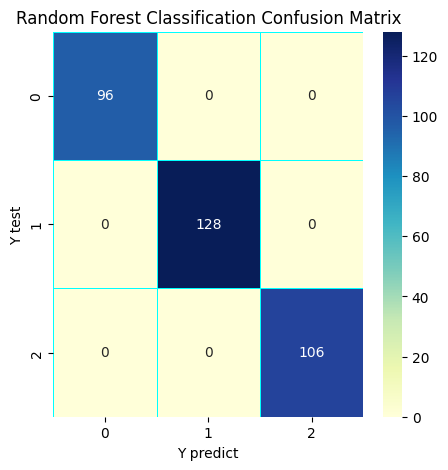

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
rfcla_cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [77]:
# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
knn_6 = KNeighborsClassifier(n_neighbors=6)
knn_6.fit(x_train, y_train)
y_pred_6 = knn_6.predict(x_test)

In [81]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_6)))

Model accuracy score: 0.9970


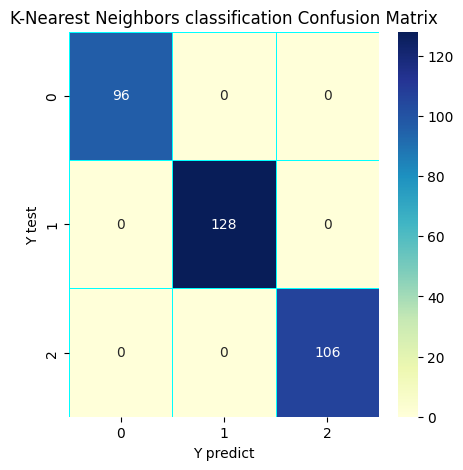

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
knn_cm = confusion_matrix(y_test, y_pred_6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('K-Nearest Neighbors classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()